In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random as rand

---



For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
#print(bdata.data.shape)
#print(bdata.target.shape)
#uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)
#Convert the object to a dataframe
print(bdata.feature_names)
boston  = pd.DataFrame(data=bdata.data,columns=bdata.feature_names)
#boston

dict_keys(['target', 'feature_names', 'data', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of acc




---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


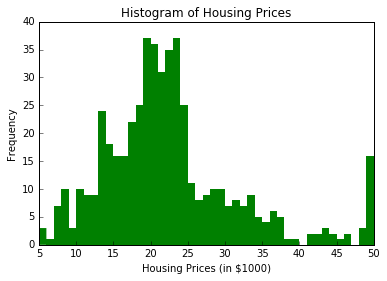

In [4]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

binwidth = 1

# Set title and labels
plt.title("Histogram of Housing Prices");
plt.xlabel("Housing Prices (in $1000)")
plt.ylabel("Frequency")

#Set ticks off
plt.tick_params(top='off',right='off')

#Remove borders
hist = plt.hist(bdata.target,bins=np.arange(min(bdata.target), max(bdata.target) + binwidth, binwidth),color="green",edgecolor="none")

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


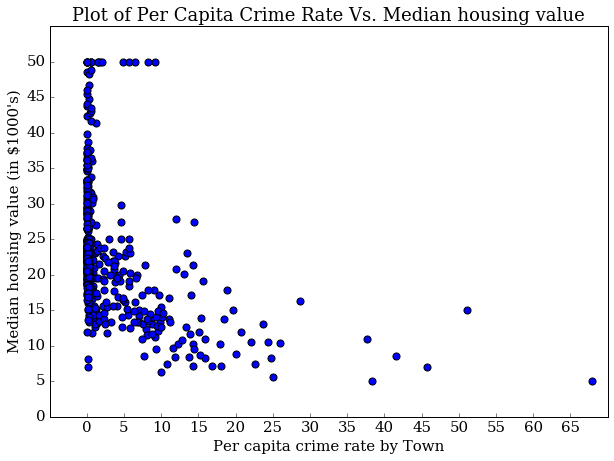

In [5]:
# enter your code below
#Add column for MEDV from bdata
series = pd.Series(bdata.target)

#Assign list values
boston['MEDV'] = series.values

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'serif'})

#Choose tick interval and range
x_ticks = np.arange(0,70,5)
y_ticks = np.arange(0,55,5)

#Set variables
plt.scatter(boston['CRIM'],boston['MEDV'],s=50)

#Set labels
plt.xlabel("Per capita crime rate by Town")
plt.ylabel("Median housing value (in $1000's)")

#Remove ticks from top and right
plt.tick_params(top='off',right='off')

#Set title
plt.title("Plot of Per Capita Crime Rate Vs. Median housing value")

#Set x and y ticks
plt.xticks(x_ticks)
plt.yticks(y_ticks)

#Increase figure size
plt.rcParams["figure.figsize"] = [10,6]
#Leave out outliers
plt.xlim([-5,70])
plt.ylim([0,55])
plt.show()

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

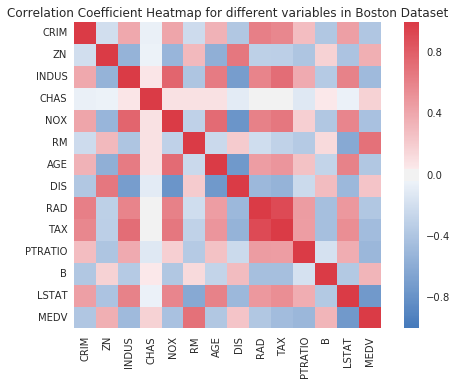

In [6]:
# enter your code here

#Import seaborn graphs
import seaborn as sns

ax = plt.axes()

#Get pearson's coefficient matrix
boston_corr = boston.corr(method='pearson')

#Plot heatmap of correlation matrix
sns.heatmap(boston_corr,square=True,cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True),ax=ax,robust=True)

#Set title
ax.set_title("Correlation Coefficient Heatmap for different variables in Boston Dataset")

#Increasing figure size
plt.rcParams["figure.figsize"] = [10,7]
plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [94]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    return np.sqrt(((predictions - yvalues) ** 2).mean())

# Test function
predictions = (2,2,3)
yvalues = (0,2,6)

compute_rmse(np.asarray(predictions),np.asarray(yvalues))

2.0816659994661326

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [7]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
from sklearn.cross_validation import train_test_split
# enter your code here
boston['rand'] = boston.apply(lambda row: np.random.random(), axis=1)
boston['train'] = boston['rand'] < 0.66

#Get training data
bdata_train = boston[boston['train']]

#bdata = boston['MEDV']

#bdata_train, bdata_test = train_test_split(bdata, train_size=0.66, random_state=42)

#bdata_train = pd.DataFrame(bdata_train, columns=["MEDV"])
#bdata_test = pd.DataFrame(bdata_test, columns=["MEDV"])

#Get test data
bdata_test = boston[boston['train'] != True]

#print("Train dataset size ",len(bdata_train))
#print("Test dataset size ",len(bdata_test))
bdata_train =bdata_train[['MEDV']]
bdata_test =bdata_test['MEDV']

bdata_train = pd.DataFrame(bdata_train, columns=["MEDV"])
bdata_test = pd.DataFrame(bdata_test, columns=["MEDV"])

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [56]:
# enter your code here

#print(bdata_train['MEDV'].mean())

bdata_train['Pre_MEDV'] = ""
bdata_test['Pre_MEDV'] = ""

def bad_baseline_model(train,test):
    mean = np.mean(train['MEDV'])
    test['Pre_MEDV'] = mean   
    return test

#Declare test to hold values
#test_1 = np.array([bdata_train.iloc[:,13:14],np.zeros(len(bdata_train))])
test_1 = bad_baseline_model(bdata_train,bdata_train)

#Numpy array for predicted values
predicted_values = test_1.iloc[:,1].values

#Actual values
actual_values_train = bdata_train.iloc[:,0].values

#Take 315 observations from test set
train_rmse = compute_rmse(predicted_values,actual_values_train)

print("Training Set RMSE is ",train_rmse)

# Calling our mean model function and passing the results to rmse function
test_2 = bad_baseline_model(bdata_train,bdata_test)

#Numpy array for predicted values
predicted_values_test = test_2.iloc[:,1].values

#Actual Test values
actual_values_test = bdata_test.iloc[:,0].values

test_rmse = compute_rmse(predicted_values_test,actual_values_test)

print("Testing Set RMSE is ",test_rmse)

Training Set RMSE is  8.85202727619
Testing Set RMSE is  9.76793999497


*Enter your observations here*

As we can see the training set RMSE is lower than the testing set RMSE because we've derived our predicted values from the mean value of the MEDV in the training set.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [8]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    #Square root of the sum of the L raised points
    dist = np.sqrt(np.sum((x1-x2)**L))
    return dist

print(distance(np.asarray((3,4)),np.asarray((6,8)),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [37]:
"""
# write your function specification here!
"""
import time
import operator
def nneighbor(train,test,predictors,L,K):
    get_dist(train,test[0])
    for i in range(len(test)):
        #dist[i] = distance(test[i][0:2],train[:,0:2],2)
        print()
        

#your additional code here
def get_dist(train,test_instance):
    rows = train.shape[0]
    dist = np.empty(shape=rows)
    dist = [get_tuple(test_instance,train[i]) for i in range(len(train))]
    sorted_distances = dist.sort(key=operator.itemgetter(1))
    sorted_training_instances = [tup[0] for tup in sorted_distances]
    
def get_tuple(test_instance,train_instance):
    return (train_instance,distance(test_instance,train_instance,2))

#Get training data
knn_train = boston[boston['train']]

#Get test data
knn_test = boston[boston['train'] != True]

#print("Train dataset size ",len(bdata_train))
#print("Test dataset size ",len(bdata_test))
train = knn_train[['CRIM','RM','MEDV']]
test = knn_test[['CRIM','RM','MEDV']]

train = np.array(train)
test = np.array(test)

nneighbor(train,test,['CRIM','RM'],2,3)

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [22]:
"""
# write your function specification here!
"""
def normalize_value(data):
    #Mean
    mean = np.mean(data)
    
    #Standard Deviation
    std = np.std(data)
    
    #Normalize each value in data
    for i in range(0,len(data)):
        data[i] = (data[i] - mean)/std
    return data

def normalize(train,test,predictors):
    # Copying test and train array to a new array
        temp_tr = np.copy(train[:])
        temp_te = np.copy(test[:])
        
        # Iterate predictors columns and normalize
        for predictor in predictors:
            temp_tr[:,np.where(bdata.feature_names == predictor)[0][0]] = normalize_value(temp_tr[:, np.where(bdata.feature_names == predictor)[0][0]])
            temp_te[:,np.where(bdata.feature_names == predictor)[0][0]] = normalize_value(temp_te[:, np.where(bdata.feature_names == predictor)[0][0]])

        return (temp_tr,temp_te)

#your additional code here
norm = normalize(bdata_train,bdata_test,predictors)
print("Normalized RMSE is :",nneighbor(norm[0], norm[1], predictors, 2,0))

Time taken: 0.01 seconds
Normalized RMSE is : 13.6757764118


*enter your observations here*

We'd expect the RMSE value to be higher in case the data is normalized but we're getting the same RMSE error for both models with/without normalization.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [1]:
# enter your code here

*enter your observations here*

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [23]:
# enter your code here
def cv(bdata, predictors, L,K,model):
    start_time = time.time()
    
    length = len(bdata) - (len(bdata)%100)
    bdata_temp = [None]*10
    
    # Hold cross validtion rsults for train and test
    tr_cv = [np.empty(shape=(0, 15))]*10
    te_cv = [np.empty(shape=(0, 15))]*10
    current = -1
    iv = [None]*10
    tv = 0

    # Iterate and divide into 10 folds
    for i in range(0,10):
        bdata_temp[i] = bdata[int(np.floor(length*(i*0.1))):int(np.floor(length*(i*0.1+0.1))),:]

    # Select 1 test dataset and the rest train dataset
    for i in range(0,10):
        current += 1
        for j in range(0,10):
            if(j != current):
                tr_cv[i] = np.vstack((tr_cv[i], bdata_temp[j]))
            else:
                te_cv[i] = bdata_temp[i]  
    
    
        # Cross validation  to fit nneighbor and store RMSE
        iv[i] = model(tr_cv[i], te_cv[i], predictors,L,K)
        tv = tv + iv[i]   
        avg_rmse = tv / 10

    print("TOTAL TIME TAKEN:" + str(round(time.time() - start_time,2)) + " seconds")
    
    return avg_rmse

# Preparing and parameters to be fed to the function
predictors = ['CRIM','RM']
type_model = nneighbor

# Running the nearest cross validation function and fitting data using nearest neighbor model
normalized = normalize(bdata_train,bdata_test,predictors)
nn_cross = cv(normalized[0], predictors, 2,None,type_model)
print("RMSE after cross-validation",nn_cross)

Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
TOTAL TIME TAKEN:0.02 seconds
RMSE after cross-validation 13.1890716819


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [29]:
"""
# write your function specification here!
"""
def knn(train, test, predictors, L, K):
    start_time = time.time()
     
    medv_tr = train[:,13:14]
    medv_te = test[:,13:14]
    
    # Create array for actual and predcited and predictor variables
    tr = np.hstack((medv_tr, np.atleast_2d(np.arange(0,len(medv_tr),1)).T))
    te = np.hstack((medv_te, np.atleast_2d(np.arange(0,len(medv_te),1)).T))
    
    # Iterating the remaining columns of above array based on number of predictors
    for predictor in predictors:
        tr = np.hstack((tr, np.atleast_2d(train[:,np.where(bdata.feature_names == predictor)[0][0]]).T))
        te = np.hstack((te, np.atleast_2d(test[:,np.where(bdata.feature_names == predictor)[0][0]]).T))

    # Create array to hold training values
    temp_tr = np.empty([len(train), len(predictors)])
    temp_tr[:,:] = tr[:,2:]    
    sorted_tr = tr
    temp_te = np.empty([len(train), len(predictors)])

    # Calculate distance and store in array
    for i in range(0,len(te)):  
        temp_te[:,:] = te[i,2:]
        dist = distance(temp_te, temp_tr, L)
        tr[:,1] = dist 
        sorted_tr = tr
        sorted_tr = tr[tr[:,1].argsort()] 
        k = np.mean(sorted_tr[0:K,0])
        te[i,1] = k
     
    # Compute RMSE
    rmse = compute_rmse(te[:,0:1],te[:,1:2])    
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

# Predictor Variables
predictors = ['CRIM','RM']
type_model = knn

train_cross = np.copy(bdata_train[:])
test_cross = np.copy(bdata_test[:])

#Without cross validation
knn_without_cv = knn(train_cross, test_cross, predictors, 2, 3)

print("KNN with CV ",knn_without_cv)

#Normalize
norm = normalize(train_cv,test_cv,predictors)

#With cross-validation
knn_with_cv = cv(norm[0], predictors, 2,3,type_model)

print("KNN with CV ",knn_with_cv)

Time taken: 0.01 seconds
KNN with CV  9.25841540513
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
TOTAL TIME TAKEN:0.02 seconds
KNN with CV  10.6706258764


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Time taken: 0.01 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.01 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.01 seconds
TOTAL TIME TAKEN:0.04 seconds


Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
TOTAL TIME TAKEN:0.02 seconds


Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
TOTAL TIME TAKEN:0.02 seconds


Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0.0 seconds
Time taken: 0

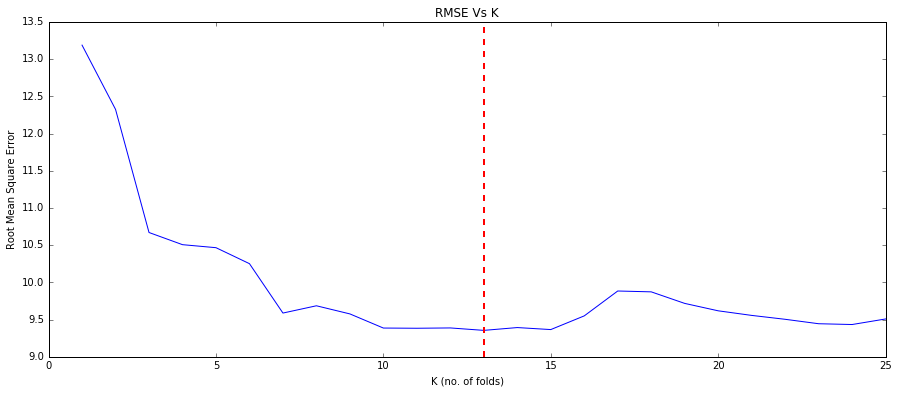

In [45]:
# Predictor variables
predictors = ['CRIM','ZN','RM','AGE','DIS','TAX']
type_model = knn
folds = 25

k_arr = np.empty([folds, 2])
k_arr[:,0] = np.arange(1,folds+1,1)

norm = normalize(bdata_train,bdata_test,predictors)
start_time = time.time()

# Iterating over different values of K to compute the RMSE for K nearest neighbor using cross validation
for i in range(1,folds+1):
    k_arr[i-1,1] = cv(norm[0],predictors,2,i,type_model)
    print('\n')
    
min_rmse = np.amin(k_arr[:,1])
min_k = int(k_arr[np.where(k_arr[:,1] == min_rmse)][0][0])

print('The minimum RMSE is ', min_rmse, 'for folds -', min_k)
print("Total Time Taken: " + str(round(time.time() - start_time,2)) + " seconds")


plt.figure(1, figsize = (15,6))
plt.plot(k_arr[:,0],k_arr[:,1])
plt.axvline(min_k, color = 'red', linestyle = 'dashed', linewidth = 2)

plt.title("RMSE Vs K")
plt.xlabel("K (no. of folds)")
plt.ylabel("Root Mean Square Error")
plt.show()

*Enter your observations here*